In [ ]:
import pandas as pd
import numpy as np
# Reading the CSV file "impure_dataset_final.csv" into a pandas DataFrame
data = pd.read_csv("impure_dataset_final.csv");

# Displaying the first 5 rows of the DataFrame
data.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,SugarConsumption,Diabetes
0,4,Male,0,1,26,Non Smoker,0,1.0,Does not Eat,Eat,0.0,good,5.0,30.0,No,No,1,High,No
1,12,Male,1,1,26,Smoker,0,0.0,Eat,Does not Eat,0.0,good,0.0,0.0,No,Yes,1,High,No
2,13,Male,0,1,26,Non Smoker,0,1.0,Eat,No,0.0,excellent,0.0,10.0,No,No,0,High,No
3,11,Male,1,1,28,Smoker,0,1.0,Eat,Eat,0.0,good,0.0,3.0,No,No,1,High,No
4,8,Female,0,1,29,Smoker,0,1.0,Eat,Eat,0.0,very good,0.0,0.0,No,No,0,High,No


In [ ]:
# Displaying number of rows and columns in the DataFrame
data.shape

(70707, 19)

In [ ]:
# Creating a dictionary to store key information about the dataset
dataset_info = {
    "Number of rows in the dataset are": data.shape[0],
    "Number of columns in the dataset are ": data.shape[1],
    "Names of the columns": data.columns.tolist()
}

dataset_info

{'Number of rows in the dataset are': 70707,
 'Number of columns in the dataset are ': 19,
 'Names of the columns': ['Age',
  'Sex',
  'HighChol',
  'CholCheck',
  'BMI',
  'Smoker',
  'HeartDiseaseorAttack',
  'PhysActivity',
  'Fruits',
  'Veggies',
  'HvyAlcoholConsump',
  'GenHlth',
  'MentHlth',
  'PhysHlth',
  'DiffWalk',
  'Stroke',
  'HighBP',
  'SugarConsumption',
  'Diabetes']}

In [ ]:
# Printing the metadata of the dataset
data.describe()

,Age,HighChol,CholCheck,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,HighBP
count,70707.000000,70707.000000,70707.000000,70707.000000,70511.000000,69775.000000,69759.000000,69743.000000,70707.000000
mean,8.581116,0.525747,0.975264,0.147878,0.703124,0.042809,3.760447,5.810719,0.563466
std,2.864696,0.499340,0.155320,0.354981,0.456885,0.202428,8.165618,10.060229,0.495959
min,-31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,6.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000


In [ ]:
# Step 1: Removing duplicate rows
print("Number of duplicated rows in the dataset are:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of rows after removing duplicated data are:", len(data))

Number of duplicated rows in the dataset are: 5554
Number of rows after removing duplicated data are: 65153


In [ ]:
# Step 2: Remove missing values
# Calculates the number of non-null values in every column
data.isnull().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,987
Smoker,1013
HeartDiseaseorAttack,0
PhysActivity,196
Fruits,232
Veggies,215


In [ ]:
# Printing the total number of null values in every column
total_missing_values = data.isnull().sum().sum()
print("Total number of missing values in the dataset are:", total_missing_values)

Total number of missing values in the dataset are: 6702


In [ ]:
# Removing the columns with missing values less than 300
missingvalues_less_than_300 = data.isnull().sum() < 300
columns_to_drop = data.columns[missingvalues_less_than_300]
data.dropna(subset=columns_to_drop, inplace=True)
print("Number of rows after removing columns with missing values less than 300 are:", len(data))

Number of rows after removing columns with missing values less than 300 are: 64286


In [ ]:
# Step 3: Remove inconsistencies
for column in data.columns:
    unique_items = data[column].unique()
    print(f"Unique items in '{column}':", unique_items)

Unique items in 'Age': [  4  12  13  11   8   1   6   3  -1   7  10   9   5   2  -9 -31 -12 -21
  -3  -2  -7 -15 -19]
Unique items in 'Sex': ['Male' 'Female' 'M' 'F']
Unique items in 'HighChol': [0 1]
Unique items in 'CholCheck': [1 0]
Unique items in 'BMI': ['26' '28' '29' '18' '31' '32' '27' '24' '21' '58' '30' '20' '22' '38'
 '40' '25' '36' '47' '19' '37' '41' '23' '34' '35' '42' '17' '33' '44' nan
 '15' '52' '69' '56' '45' '39' '92' '98' '50' '46' '79' '48' '16' '63'
 '72' '54' '49' '68' '43' '84' '31.0 kg/m2' '53' '73' '76' '55' '51' '75'
 '57' '25.0 kg/m2' '60' '33.0 kg/m2' '77' '82' '67' '71' '61' '14' '81'
 '59' '29.0 kg/m2' '24.0 kg/m2' '86' '28.0 kg/m2' '13' '87' '65' '95' '89'
 '62' '64' '66' '85' '70' '83' '38.0 kg/m2' '34.0 kg/m2' '80' '21.0 kg/m2'
 '78' '26.0 kg/m2']
Unique items in 'Smoker': ['Non Smoker' 'Smoker' nan]
Unique items in 'HeartDiseaseorAttack': [0 1]
Unique items in 'PhysActivity': [1. 0.]
Unique items in 'Fruits': ['Does not Eat' 'Eat' 'No' 'Yes']
Unique i

In [ ]:
data['Sex'] = data['Sex'].replace(['Male', 'Female'], ['M', 'F'])
data['Fruits'] = data['Fruits'].replace(['Yes', 'No'], ['Eat', 'Does not Eat'])
data['Veggies'] = data['Veggies'].replace(['Yes', 'No'], ['Eat', 'Does not Eat'])
data['DiffWalk'] = data['DiffWalk'].replace(['Yes', 'No'], ['Y', 'N'])
data['Stroke'] = data['Stroke'].replace(['Yes', 'No'], ['Y', 'N'])
data['Diabetes'] = data['Diabetes'].replace(['Yes', 'No'], ['Y', 'N'])
data['BMI'] = data['BMI'].astype(str).str.replace(' kg/m2', '').astype(float)
for column in data.columns:
    unique_items = data[column].unique()
    print(f"Unique items in '{column}':", unique_items)

Unique items in 'Age': [  4  12  13  11   8   1   6   3  -1   7  10   9   5   2  -9 -31 -12 -21
  -3  -2  -7 -15 -19]
Unique items in 'Sex': ['M' 'F']
Unique items in 'HighChol': [0 1]
Unique items in 'CholCheck': [1 0]
Unique items in 'BMI': [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. nan 15. 52. 69. 56. 45. 39. 92.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 53. 73. 76. 55. 51.
 75. 57. 60. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78.]
Unique items in 'Smoker': ['Non Smoker' 'Smoker' nan]
Unique items in 'HeartDiseaseorAttack': [0 1]
Unique items in 'PhysActivity': [1. 0.]
Unique items in 'Fruits': ['Does not Eat' 'Eat']
Unique items in 'Veggies': ['Eat' 'Does not Eat']
Unique items in 'HvyAlcoholConsump': [ 0.  1. nan]
Unique items in 'GenHlth': ['good' 'excellent' 'very good' 'fair' 'poor' nan]
Unique items in 'MentHlth': [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15

In [ ]:
# Step 4: Filling null values  with mode and mean
for col in data.columns:
  if data[col].isnull().any():
    if data[col].dtype == 'object':
      data[col].fillna(data[col].mode()[0], inplace=True)
    else:
      data[col].fillna(data[col].mean(), inplace=True)
print("After imputing the null values in the dataset are:", data.isnull().sum().sum())

<ipython-input-11-620abaea7507>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-11-620abaea7507>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

After imputing the null values in the dataset are: 0


In [ ]:
# Step 5: Removing negative values in age column
print("Number of negative values in the 'Age' column:", (data['Age'] < 0).sum())
data = data[data['Age'] >= 0]
print("Number of rows after removing negative values:", len(data))

Number of negative values in the 'Age' column: 11
Number of rows after removing negative values: 64275


In [ ]:
# Step 6: Creating new attribute AgeGroup to classify as kids and teens
age_bins = [0, 10, 100]
age_labels = ['Kid', 'Teen']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
print("Number of kids and teens in the dataset are:")
print(data['Age_Group'].value_counts())
data.head(5)

Number of kids and teens in the dataset are:
Age_Group
Kid     46796
Teen    17479
Name: count, dtype: int64


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,SugarConsumption,Diabetes,Age_Group
0,4,M,0,1,26.0,Non Smoker,0,1.0,Does not Eat,Eat,0.0,good,5.0,30.0,N,N,1,High,N,Kid
1,12,M,1,1,26.0,Smoker,0,0.0,Eat,Does not Eat,0.0,good,0.0,0.0,N,Y,1,High,N,Teen
2,13,M,0,1,26.0,Non Smoker,0,1.0,Eat,Does not Eat,0.0,excellent,0.0,10.0,N,N,0,High,N,Teen
3,11,M,1,1,28.0,Smoker,0,1.0,Eat,Eat,0.0,good,0.0,3.0,N,N,1,High,N,Teen
4,8,F,0,1,29.0,Smoker,0,1.0,Eat,Eat,0.0,very good,0.0,0.0,N,N,0,High,N,Kid


In [ ]:
# Step 7: Data type conversion for BMI column
data['BMI'] = data['BMI'].astype(int)
data['Age'] = data['Age'].astype(int)
data.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,SugarConsumption,Diabetes,Age_Group
0,4,M,0,1,26,Non Smoker,0,1.0,Does not Eat,Eat,0.0,good,5.0,30.0,N,N,1,High,N,Kid
1,12,M,1,1,26,Smoker,0,0.0,Eat,Does not Eat,0.0,good,0.0,0.0,N,Y,1,High,N,Teen
2,13,M,0,1,26,Non Smoker,0,1.0,Eat,Does not Eat,0.0,excellent,0.0,10.0,N,N,0,High,N,Teen
3,11,M,1,1,28,Smoker,0,1.0,Eat,Eat,0.0,good,0.0,3.0,N,N,1,High,N,Teen
4,8,F,0,1,29,Smoker,0,1.0,Eat,Eat,0.0,very good,0.0,0.0,N,N,0,High,N,Kid


In [ ]:
# Step 8: Creating new attribute "BMI_Group"
bmi_bins = [18, 25, 30, 40, 70]
bmi_labels = ['UnderWeight', 'HealthyWeight', 'OverWeight', 'Obese']
data['BMI_Group'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels)
print("Number of BMI groups in the dataset are:")
print(data['BMI_Group'].value_counts())
data.head(5)

Number of BMI groups in the dataset are:
BMI_Group
HealthyWeight    22293
OverWeight       20612
UnderWeight      15842
Obese             4764
Name: count, dtype: int64


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,SugarConsumption,Diabetes,Age_Group,BMI_Group
0,4,M,0,1,26,Non Smoker,0,1.0,Does not Eat,Eat,...,good,5.0,30.0,N,N,1,High,N,Kid,HealthyWeight
1,12,M,1,1,26,Smoker,0,0.0,Eat,Does not Eat,...,good,0.0,0.0,N,Y,1,High,N,Teen,HealthyWeight
2,13,M,0,1,26,Non Smoker,0,1.0,Eat,Does not Eat,...,excellent,0.0,10.0,N,N,0,High,N,Teen,HealthyWeight
3,11,M,1,1,28,Smoker,0,1.0,Eat,Eat,...,good,0.0,3.0,N,N,1,High,N,Teen,HealthyWeight
4,8,F,0,1,29,Smoker,0,1.0,Eat,Eat,...,very good,0.0,0.0,N,N,0,High,N,Kid,HealthyWeight


In [ ]:
# Step 9: Label Encoding to convert categorical values into numerical labels
from sklearn.preprocessing import LabelEncoder
lbl_encod = LabelEncoder()

for column in data.columns:
  if data[column].dtype == 'object' or 'category':
    data[column] = lbl_encod.fit_transform(data[column])
data.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,SugarConsumption,Diabetes,Age_Group,BMI_Group
0,3,1,0,1,13,0,0,1,0,1,...,2,6,31,0,0,1,0,0,0,0
1,11,1,1,1,13,1,0,0,1,0,...,2,0,0,0,1,1,0,0,1,0
2,12,1,0,1,13,0,0,1,1,0,...,0,0,11,0,0,0,0,0,1,0
3,10,1,1,1,15,1,0,1,1,1,...,2,0,3,0,0,1,0,0,1,0
4,7,0,0,1,16,1,0,1,1,1,...,4,0,0,0,0,0,0,0,0,0


In [ ]:
# Step 10: Dropping Features
# Dropping SugarComputation as this feature does not correlate with the target variable and it might not contribute to improving the model's performance
print("Number of High and Low values in SugarComputation:")
print(data['SugarConsumption'].value_counts())
data = data.drop(columns=['SugarConsumption'])
data.head(5)

Number of High and Low values in SugarComputation:
SugarConsumption
0    64271
1        4
Name: count, dtype: int64


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Age_Group,BMI_Group
0,3,1,0,1,13,0,0,1,0,1,0,2,6,31,0,0,1,0,0,0
1,11,1,1,1,13,1,0,0,1,0,0,2,0,0,0,1,1,0,1,0
2,12,1,0,1,13,0,0,1,1,0,0,0,0,11,0,0,0,0,1,0
3,10,1,1,1,15,1,0,1,1,1,0,2,0,3,0,0,1,0,1,0
4,7,0,0,1,16,1,0,1,1,1,0,4,0,0,0,0,0,0,0,0


In [ ]:
# Step 11: Removing outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound for '{column}': {lower_bound}")
    print(f"Upper bound for '{column}': {upper_bound}")
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

columns_to_clean = ['BMI', 'Age']
for col in columns_to_clean:
    data = remove_outliers(data, col)

print("Number of rows after removing outliers:", len(data))


Lower bound for 'BMI': 0.0
Upper bound for 'BMI': 32.0
Lower bound for 'Age': 0.0
Upper bound for 'Age': 16.0
Number of rows after removing outliers: 62168


##Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

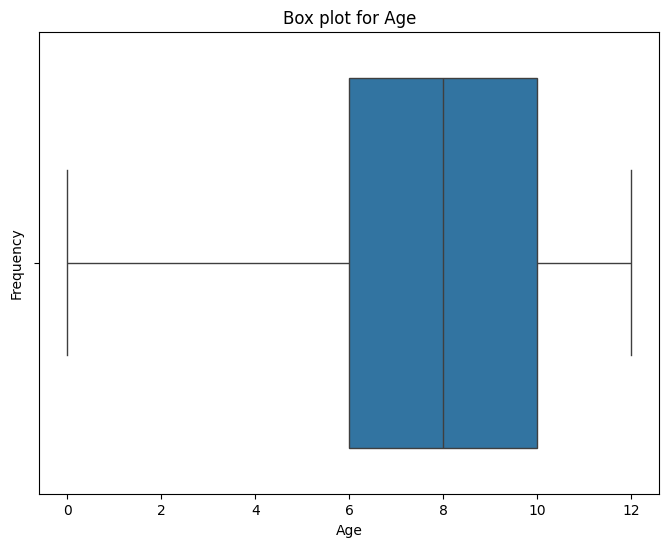

In [ ]:
# 1. Box Plot

# Box Plot for age
plt.figure(figsize=(8, 6))
# Creating a box plot for the "Age" column in the dataset
sns.boxplot(data=data, x="Age")
# label for x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Box plot for Age")
# Display the plot
plt.show()


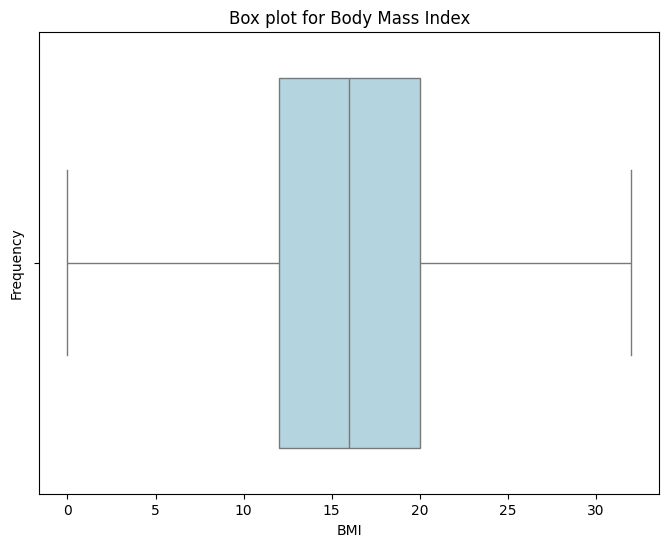

In [ ]:
# BOX PLOT for BMI
# Creating a box plot for the "BMI" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="BMI", color="lightBlue")
# label for x-axis and y-axis
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Box plot for Body Mass Index")
# Display the plot
plt.show()



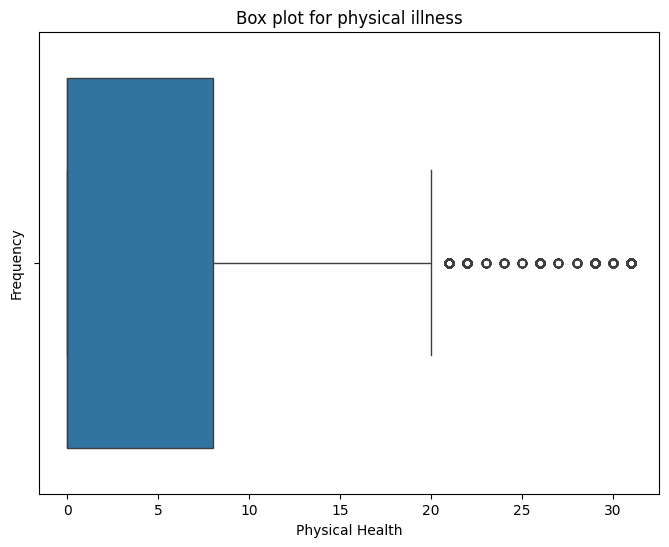

In [ ]:
# Box Plot for physical health
# Create a box plot for the "PhysHlth" column in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="PhysHlth")
# label for x-axis and y-axis
plt.xlabel("Physical Health")
plt.ylabel("Frequency")
plt.title("Box plot for physical illness")
# Display the plot
plt.show()



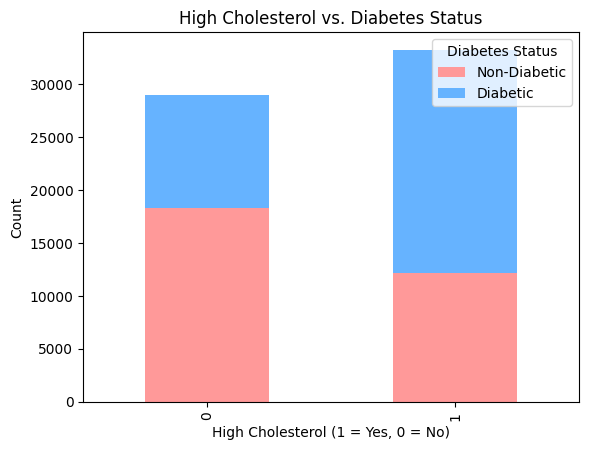

In [ ]:
# 2. Stacked Bar Chart

# Bar Chart for highChol vs Diabities
grouped = data.groupby(['HighChol', 'Diabetes']).size().unstack()

# Defineing Colors
colors =  ['#ff9999', '#66b3ff']
# Creating stacked bar chart
grouped.plot(kind='bar', stacked=True, color=colors)
# Label x and y axis
plt.xlabel('High Cholesterol (1 = Yes, 0 = No)')
plt.ylabel('Count')
# Add title
plt.title('High Cholesterol vs. Diabetes Status')
# Add a legend to differentiate between non-diabetic and diabetic categories.
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


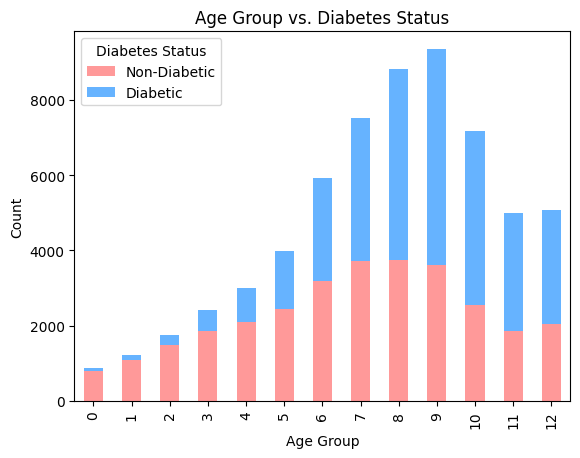

In [ ]:
# Bar Chart for Age vs Diabetes

# Group and count the data
grouped = data.groupby(['Age', 'Diabetes']).size().unstack()
# Define colors
colors = ['#ff9999', '#66b3ff']
# Plot with bar chart
grouped.plot(kind='bar', stacked=True, color=colors)
# Label X,y axis and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs. Diabetes Status')
# Add legend
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()



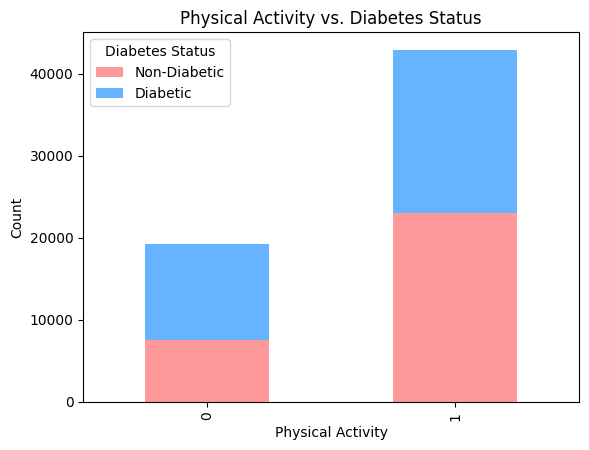

In [ ]:
# Bar Chart for Physical Activity vs Diabetes

# Group and count the data
grouped = data.groupby(['PhysActivity', 'Diabetes']).size().unstack()

# Defining colors
colors = ['#ff9999', '#66b3ff']
# Plot bar chart
grouped.plot(kind='bar', stacked=True, color=colors)
# Label X,Y axis and title
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.title('Physical Activity vs. Diabetes Status')
# Add legend
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
# Display the plot
plt.show()


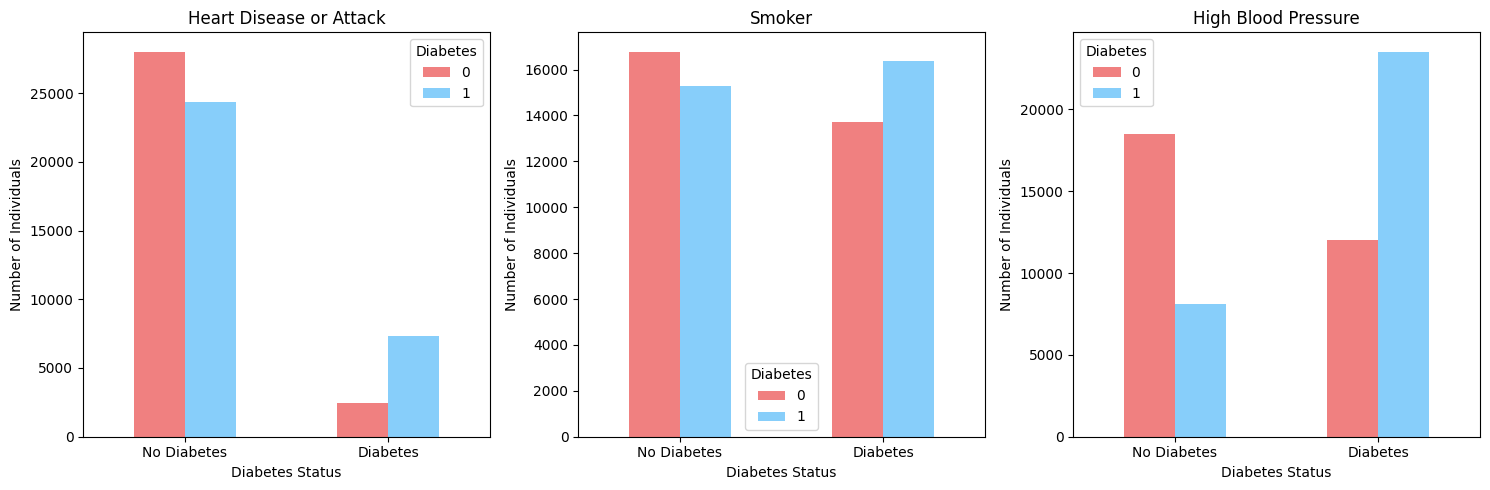

In [ ]:
# 3. Bar Chart

# Calculating the number of individuals with diabetes in each category
diabetes_counts = {
    'Heart Disease or Attack': data.groupby('HeartDiseaseorAttack')['Diabetes'].value_counts().unstack().fillna(0),
    'Smoker': data.groupby('Smoker')['Diabetes'].value_counts().unstack().fillna(0),
    'High Blood Pressure': data.groupby('HighBP')['Diabetes'].value_counts().unstack().fillna(0)
}

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot bar charts for each category
for ax, (title, counts) in zip(axs, diabetes_counts.items()):
    counts.plot(kind='bar', ax=ax, color=['lightcoral', 'lightskyblue'])
    ax.set_title(title)
    ax.set_xlabel('Diabetes Status')
    ax.set_ylabel('Number of Individuals')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)

plt.tight_layout()
plt.show()


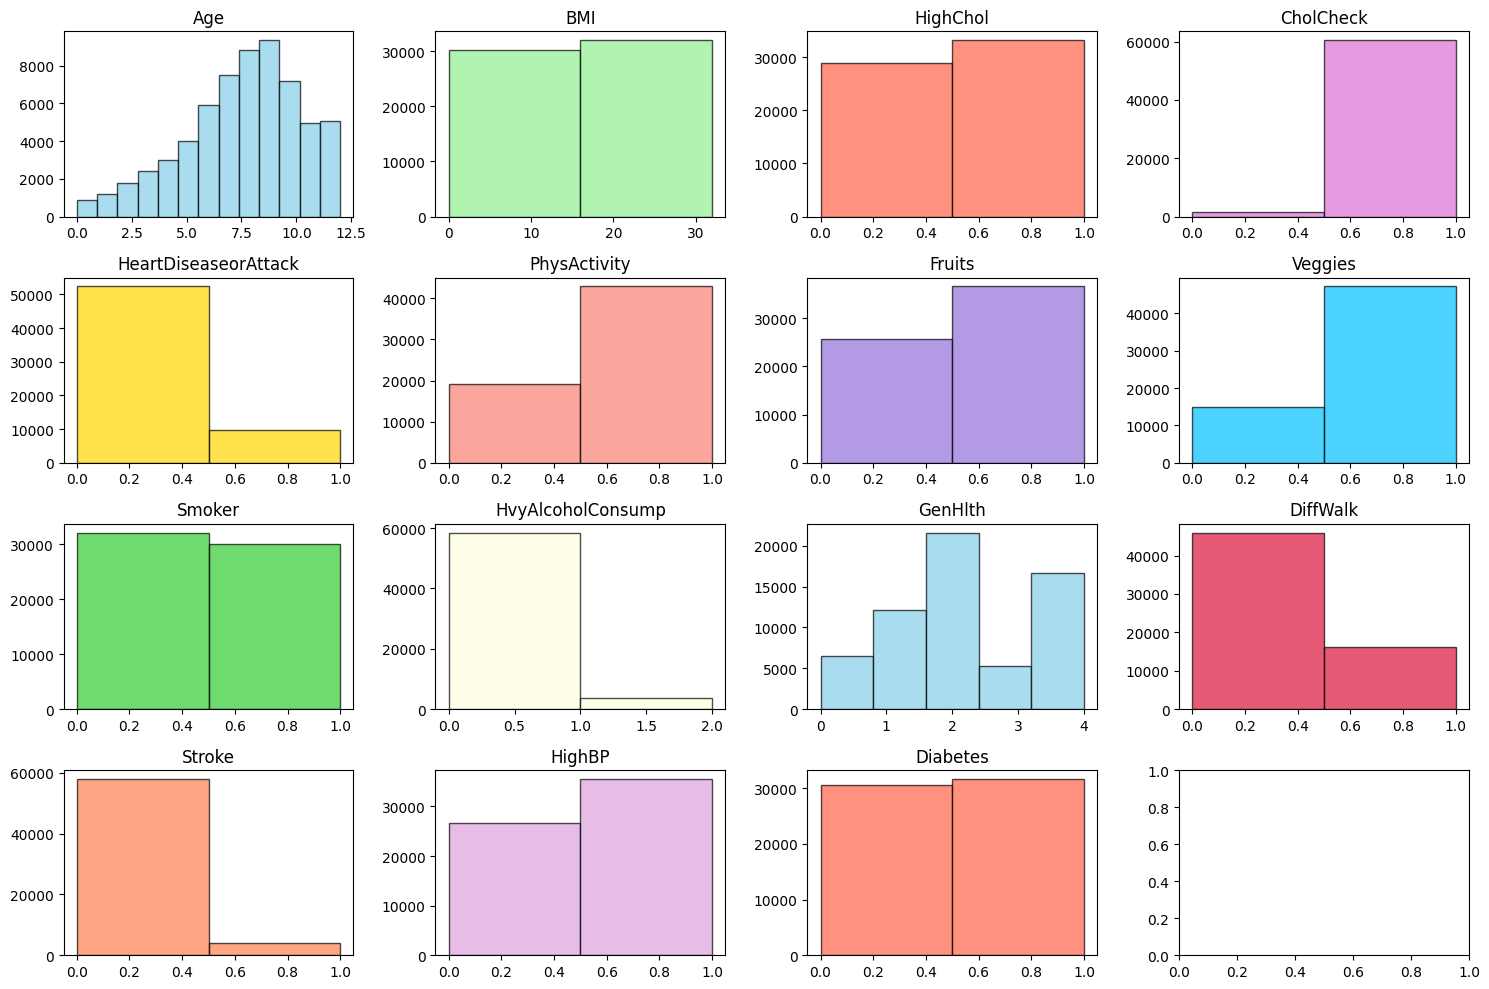

In [ ]:
# 4. Histogram

# Define data for plotting
hist_data = [
    ('Age', 13, 'skyblue'),
    ('BMI', 2, 'lightgreen'),
    ('HighChol', 2, 'tomato'),
    ('CholCheck', 2, 'orchid'),
    ('HeartDiseaseorAttack', 2, 'gold'),
    ('PhysActivity', 2, 'salmon'),
    ('Fruits', 2, 'mediumpurple'),
    ('Veggies', 2, 'deepskyblue'),
    ('Smoker', 2, 'limegreen'),
    ('HvyAlcoholConsump', 2, 'lightyellow'),
    ('GenHlth', 5, 'skyblue'),
    ('DiffWalk', 2, 'crimson'),
    ('Stroke', 2, 'coral'),
    ('HighBP', 2, 'plum'),
    ('Diabetes', 2, 'tomato')
]

fig, axs = plt.subplots(4, 4, figsize=(15, 10))

# Loop through the histogram data
for ax, (title, bins, color) in zip(axs.flatten(), hist_data):
    ax.hist(data[title], bins=bins, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title)

plt.tight_layout()
plt.show()


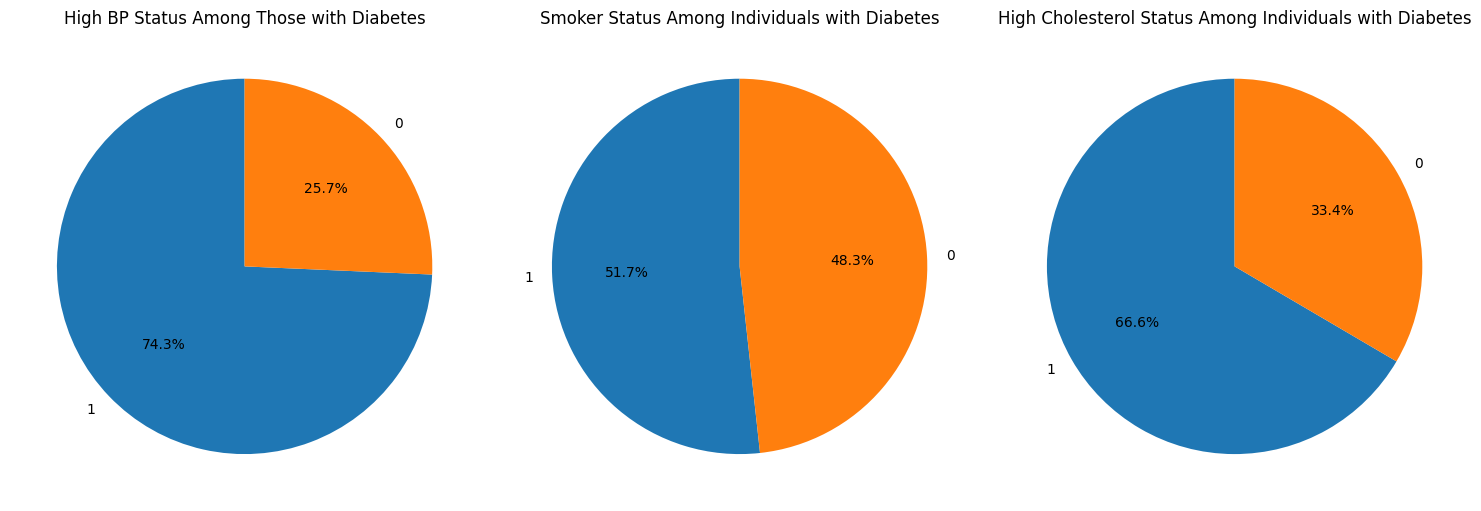

In [ ]:
# 5. Pie chart

# 1. Heavy BP Status Among Those with Diabetes
# Filter the data for individuals with diabetes and count the frequency of HighBP status
diabetes_bp_counts = data[data['Diabetes'] == 1]['HighBP'].value_counts()
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(diabetes_bp_counts, labels=diabetes_bp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('High BP Status Among Those with Diabetes')

# 2. Smoker Status Among Individuals with Diabetes
# Filter the data for individuals with diabetes and count the frequency of smoker status
diabetes_smoker_counts = data[data['Diabetes'] == 1]['Smoker'].value_counts()
plt.subplot(1, 3, 2)
plt.pie(diabetes_smoker_counts, labels=diabetes_smoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Smoker Status Among Individuals with Diabetes')

# 3. High Cholesterol Status Among Individuals with Diabetes
# Filter the data for individuals with diabetes and count the frequency of HighChol status (1 for High Cholesterol, 0 for Normal Cholesterol)
diabetes_chol_counts = data[data['Diabetes'] == 1]['HighChol'].value_counts()
plt.subplot(1, 3, 3)
plt.pie(diabetes_chol_counts, labels=diabetes_chol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('High Cholesterol Status Among Individuals with Diabetes')

# Adjust layout to prevent overlap and improve readability.
plt.tight_layout()
plt.show()


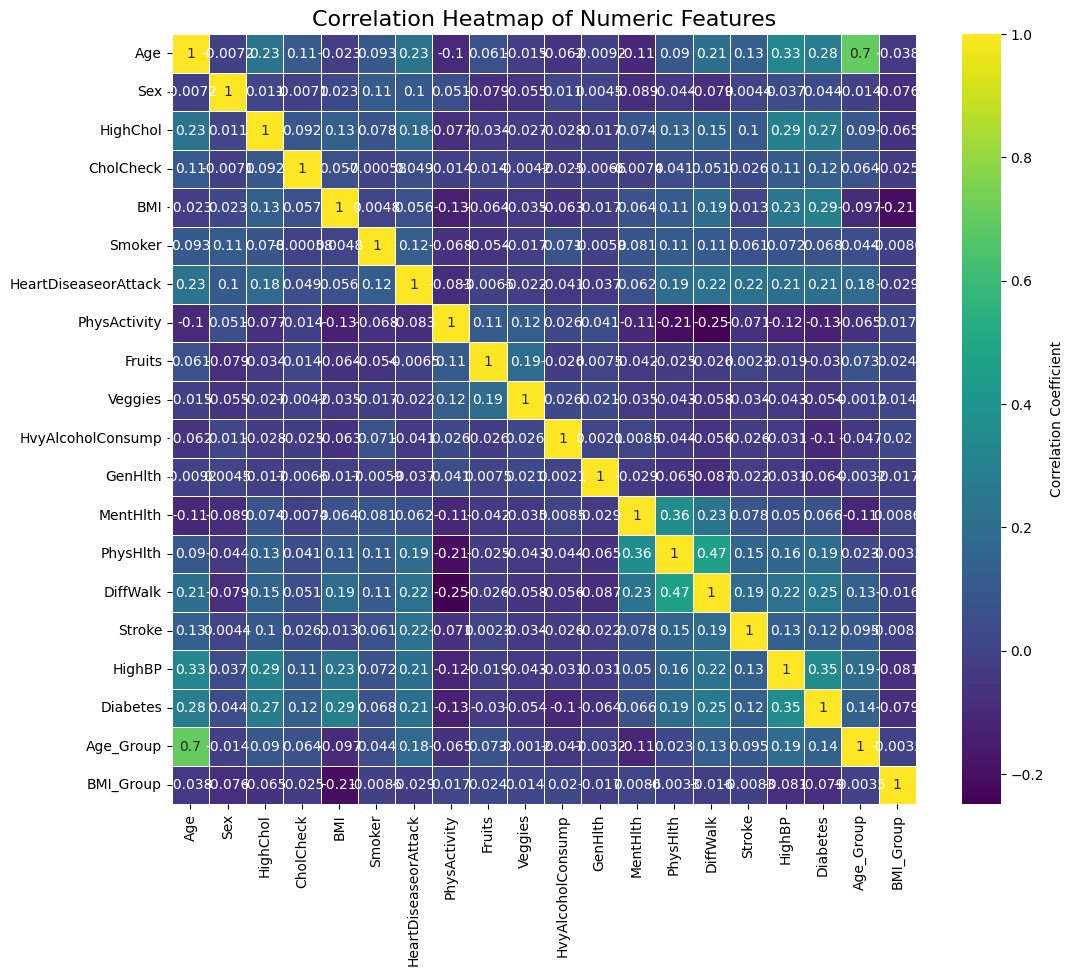

In [ ]:
# 6. Heatmap

# Filter to include only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap for the correlation
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()



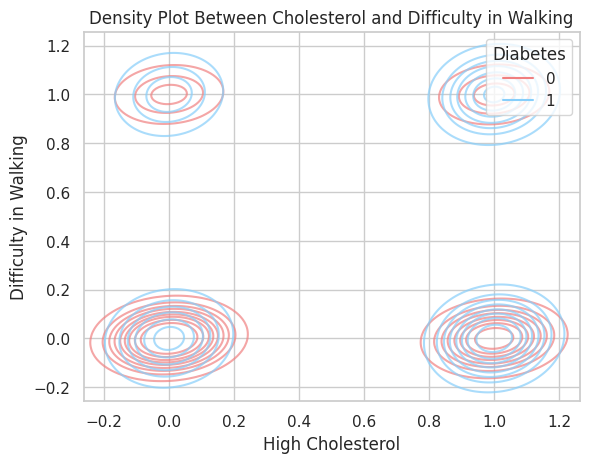

In [ ]:
# 7. Density plot
sns.set(style="whitegrid")

# Density plot by considering HighChol and DiffWalk and assign colors for Diabetes
sns.kdeplot(data=data, x="HighChol", y="DiffWalk", hue="Diabetes",
            palette=["lightcoral", "lightskyblue"], alpha=0.7)

# Add labels and titles for the graph
plt.xlabel("High Cholesterol")
plt.ylabel("Difficulty in Walking")
plt.title("Density Plot Between Cholesterol and Difficulty in Walking")

#Plot the graph
plt.show()


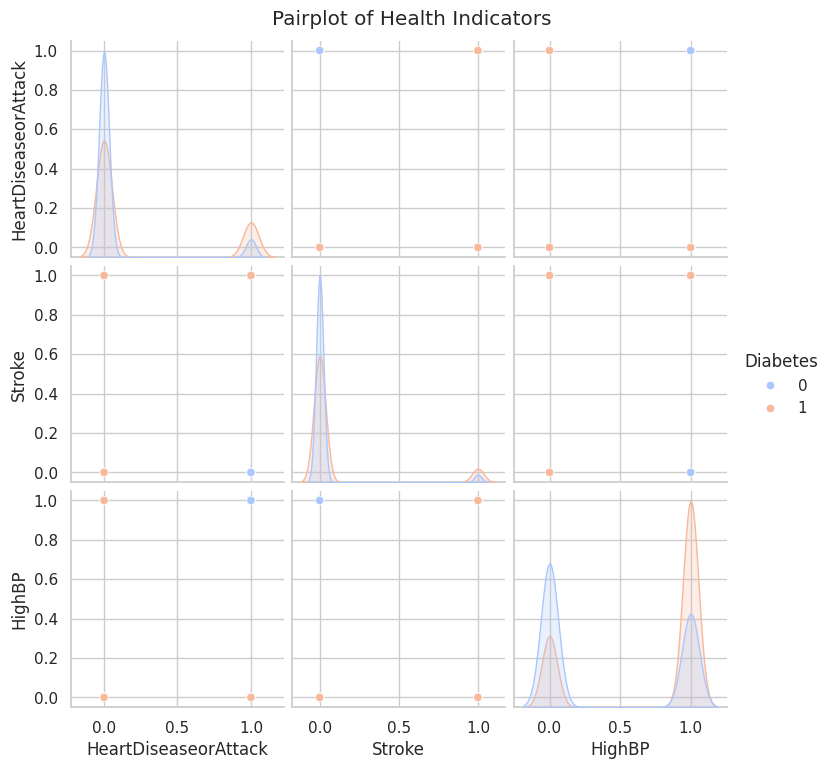

In [ ]:
# 8. Piarplot of Health Indicators

# Create subset of health indicator features
subset_columns = ['HeartDiseaseorAttack', 'Stroke', 'HighBP', 'Diabetes']

# Paiplot with KDE
sns.pairplot(data[subset_columns], hue='Diabetes', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Health Indicators', y=1.02)

# Plot the graph
plt.show()

In [ ]:
# 9. Scatter plot of Age vs BMI
fig = px.scatter(data,
                 x='Age',
                 y='BMI',
                 color='HeartDiseaseorAttack',
                 title='Animated Scatter Plot of Age vs BMI Over Time',
                 labels={'HeartDiseaseorAttack': 'Heart Disease'})

#Plot the graph
fig.show()


In [ ]:
# 10. Bar graph of correlations with Diabetes

# Calculate correlation with Diabetes feature
correlation_values = data.drop(columns='Diabetes').corrwith(data['Diabetes']).reset_index()
correlation_values.columns = ['Feature', 'Correlation']

fig = px.bar(correlation_values,
             x='Feature',
             y='Correlation',
             title='Correlation with Diabetes',
             color='Correlation',
             color_continuous_scale='Viridis')

# Update the layout of the plot
fig.update_layout(xaxis_title='Features', yaxis_title='Correlation Coefficient',
                  xaxis_tickangle=-45, template='plotly_white')

# Plot the graph
fig.show()


In [ ]:
# 11. 3D Scatter plot of GEnHlth, MentHith vs BMI
fig = px.scatter_3d(data, x='GenHlth', y='MentHlth', z='BMI', color='BMI', title='3D Scatter Plot')
fig.update_traces(marker=dict(colorscale='Viridis', size=4))

fig.update_layout(width=800, height=600)

#Plot the graph
fig.show()

In [ ]:
# 12. Stacked bar chart of Smoker Frequency with it's frequency(Count)
aggregated_data = data.groupby(['Age', 'Smoker']).size().reset_index(name='Frequency')

# Create an interactive stacked bar plot using Plotly Express
fig = px.bar(aggregated_data,
             x='Age',
             y='Frequency',
             color='Smoker',
             title='Smoker Status Across Age',
             labels={'Smoker': 'Smoker Status'},
             color_discrete_sequence=['#ff9999', '#66b3ff'])

# Update layout for better visuals
fig.update_layout(xaxis_title='Age',
                  yaxis_title='Frequency',
                  legend_title='Smoker Status')

# Add a range slider for Age
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


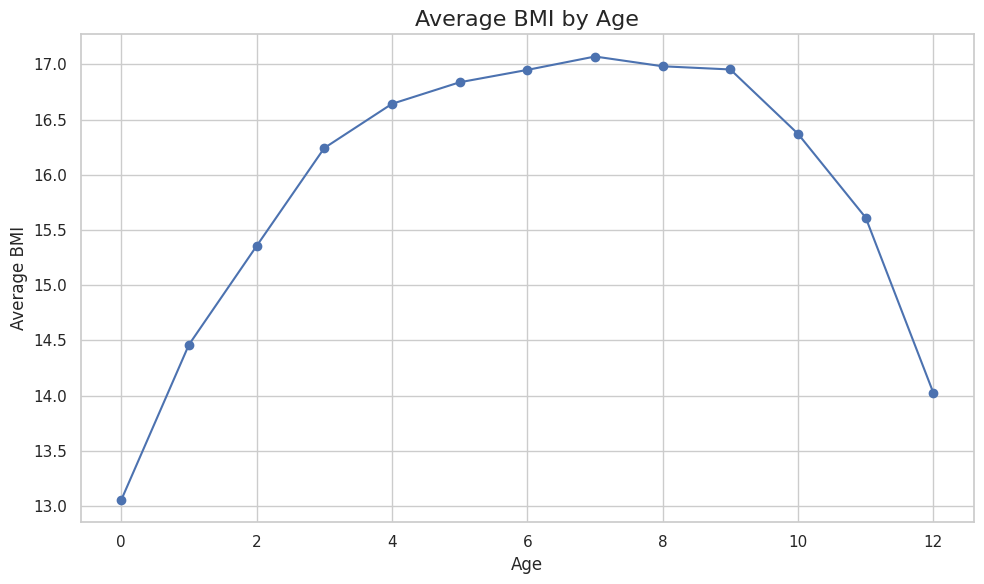

In [ ]:
# 13. Line graph of BMI by Age

# Calculate the average BMI by Age
avg_bmi_age = data.groupby('Age')['BMI'].mean()

# Create a line plot for BMI vs Age
plt.figure(figsize=(10, 6))
plt.plot(avg_bmi_age.index, avg_bmi_age.values, marker='o', color='b')

# Set titles and labels
plt.title('Average BMI by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average BMI', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# PHASE - 2

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initial k-NN Accuracy: 0.6806337461798295
Training Report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77     24420
           1       0.77      0.80      0.79     25314

    accuracy                           0.78     49734
   macro avg       0.78      0.78      0.78     49734
weighted avg       0.78      0.78      0.78     49734

Testing Report
               precision    recall  f1-score   support

           0       0.68      0.65      0.67      6073
           1       0.68      0.71      0.69      6361

    accuracy                           0.68     12434
   macro avg       0.68      0.68      0.68     12434
weighted avg       0.68      0.68      0.68     12434



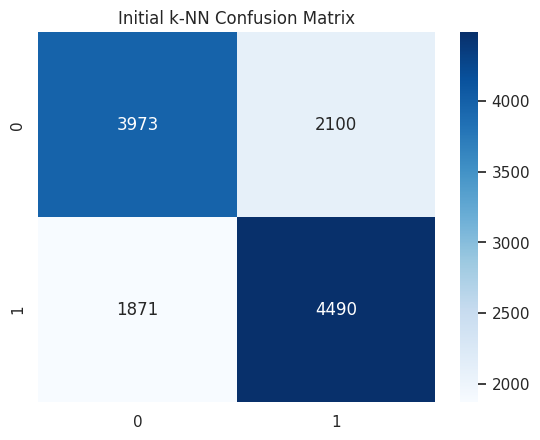

In [ ]:
# 1. K-Nearest Neighbors

# Initializing the model
knn = KNeighborsClassifier()

# Fitting the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Initial k-NN Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , knn.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , knn.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Initial k-NN Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Tuned KNN Accuracy: 0.7048415634550427
Training Report
               precision    recall  f1-score   support

           0       0.77      0.72      0.74     24420
           1       0.75      0.80      0.77     25314

    accuracy                           0.76     49734
   macro avg       0.76      0.76      0.76     49734
weighted avg       0.76      0.76      0.76     49734

Testing Report
               precision    recall  f1-score   support

           0       0.71      0.67      0.69      6073
           1       0.70      0.74      0.72      6361

    accuracy                           0.70     12434
   macro avg       0.71      0.70      0.70     12434
weighted avg       0.71      0.70      0.70     12434



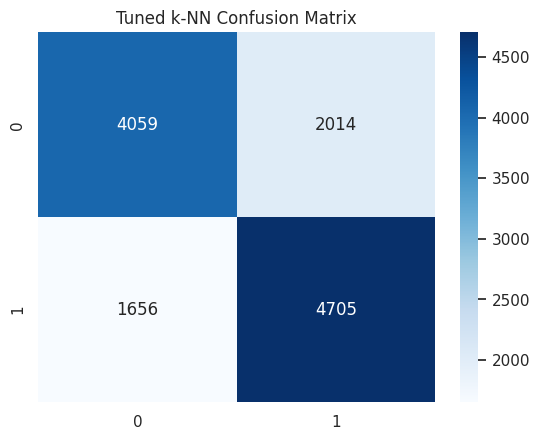

In [ ]:
# Tuning of KNN

# Defining the parameter grid
params_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setting up the grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, scoring='accuracy', cv=5)

# Fitting the grid search to the training data
grid_knn.fit(X_train, y_train)

# Best KNN model and its accuracy
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Display the tuned results
print(f'Best KNN Parameters: {grid_knn.best_params_}')
print(f'Tuned KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}')

# Training Report
print('Training Report\n',classification_report(y_train , grid_knn.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , grid_knn.predict(X_test), digits=2))

# Confusion matrix for the best model
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned k-NN Confusion Matrix')
plt.show()


Naive Bayes Accuracy: 0.7186746018980216
Training Report
               precision    recall  f1-score   support

           0       0.72      0.68      0.70     24420
           1       0.71      0.75      0.73     25314

    accuracy                           0.71     49734
   macro avg       0.71      0.71      0.71     49734
weighted avg       0.71      0.71      0.71     49734

Testing Report
               precision    recall  f1-score   support

           0       0.72      0.69      0.70      6073
           1       0.71      0.75      0.73      6361

    accuracy                           0.72     12434
   macro avg       0.72      0.72      0.72     12434
weighted avg       0.72      0.72      0.72     12434



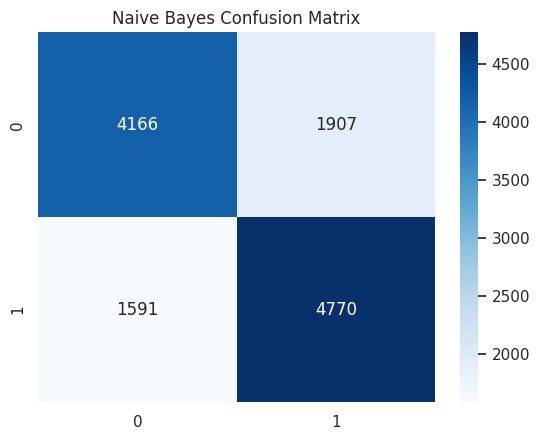

In [ ]:
# 2. Naive Bayes

# Initializing the Gaussian Naive Bayes model
nb = GaussianNB()

# Fitting the model to the training data
nb.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , nb.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , nb.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()




Logistic Regression Accuracy: 0.72534984719318
Training Report
               precision    recall  f1-score   support

           0       0.73      0.69      0.71     24420
           1       0.72      0.75      0.73     25314

    accuracy                           0.72     49734
   macro avg       0.72      0.72      0.72     49734
weighted avg       0.72      0.72      0.72     49734

Testing Report
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      6073
           1       0.72      0.75      0.74      6361

    accuracy                           0.73     12434
   macro avg       0.73      0.72      0.72     12434
weighted avg       0.73      0.73      0.73     12434



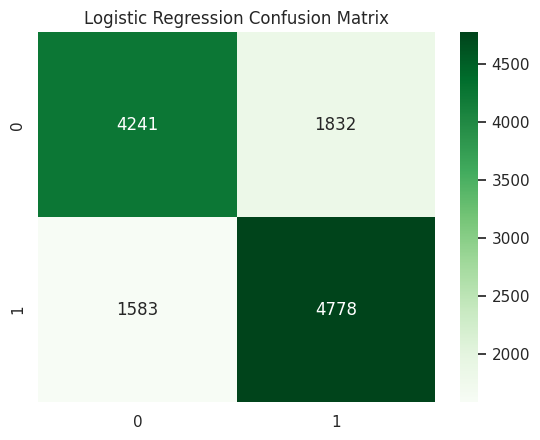

In [ ]:
# 3. Logistic Regression

# Initializing the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fitting the model to the training data
lr.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , lr.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , lr.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


SVM Accuracy: 0.7298536271513592
Training Report
               precision    recall  f1-score   support

           0       0.75      0.66      0.70     24420
           1       0.71      0.79      0.74     25314

    accuracy                           0.72     49734
   macro avg       0.73      0.72      0.72     49734
weighted avg       0.73      0.72      0.72     49734

Testing Report
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      6073
           1       0.71      0.79      0.75      6361

    accuracy                           0.73     12434
   macro avg       0.73      0.73      0.73     12434
weighted avg       0.73      0.73      0.73     12434



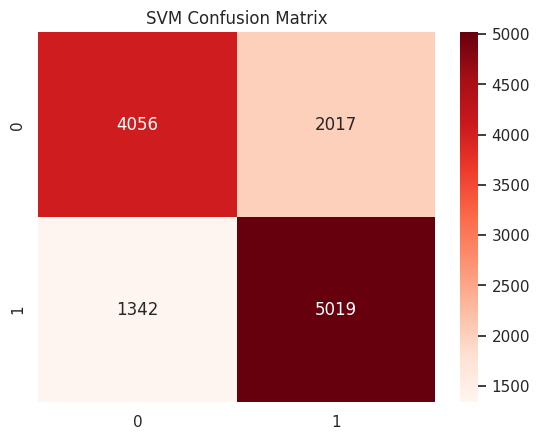

In [ ]:
# 4. Support Vector Machine (SVM) -

# Initializing the SVM model
svm = SVC(random_state = 42)

# Fitting the model to the training data
svm.fit(X_train, y_train)

# Predicting on the test data
y_pred_svm = svm.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , svm.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , svm.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.7004182081389738
Training Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     24420
           1       0.98      0.97      0.98     25314

    accuracy                           0.98     49734
   macro avg       0.98      0.98      0.98     49734
weighted avg       0.98      0.98      0.98     49734

Testing Report
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      6073
           1       0.70      0.74      0.72      6361

    accuracy                           0.70     12434
   macro avg       0.70      0.70      0.70     12434
weighted avg       0.70      0.70      0.70     12434



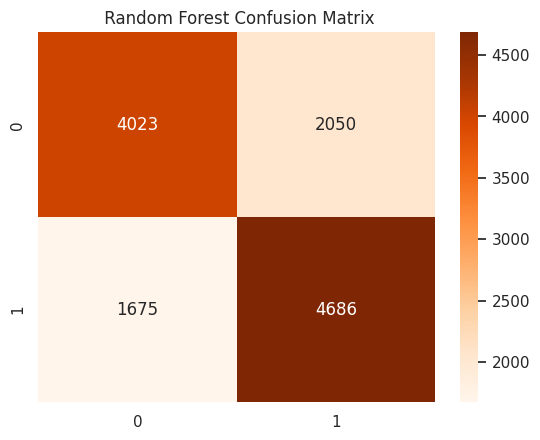

In [ ]:
# 5. Random Forest

# Initializing the Random Forest model
rf = RandomForestClassifier()

# Fitting the model to the training data
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred_rf = rf.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , rf.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , rf.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title(' Random Forest Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




 XGBoost Accuracy: 0.7370114202991797
Training Report
               precision    recall  f1-score   support

           0       0.80      0.73      0.76     24420
           1       0.76      0.82      0.79     25314

    accuracy                           0.78     49734
   macro avg       0.78      0.78      0.78     49734
weighted avg       0.78      0.78      0.78     49734

Testing Report
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      6073
           1       0.73      0.78      0.75      6361

    accuracy                           0.74     12434
   macro avg       0.74      0.74      0.74     12434
weighted avg       0.74      0.74      0.74     12434



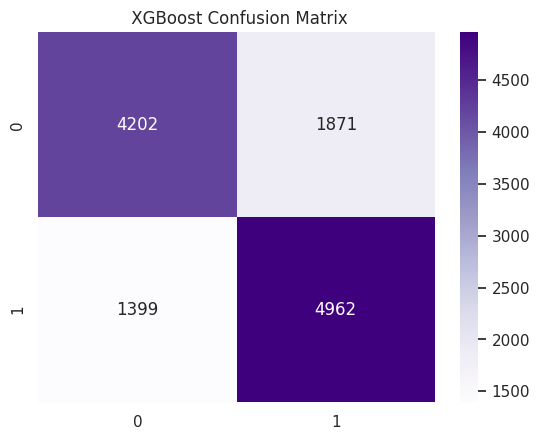

In [ ]:
# 6. XGBoost

# Initializing the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Set eval_metric to avoid warning

# Fitting the model to the training data
xgb.fit(X_train, y_train)

# Predicting on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f' XGBoost Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , xgb.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , xgb.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title(' XGBoost Confusion Matrix')
plt.show()


Initial Decision Tree Accuracy: 0.6261058388290172
Training Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     24420
           1       1.00      0.95      0.98     25314

    accuracy                           0.98     49734
   macro avg       0.98      0.98      0.98     49734
weighted avg       0.98      0.98      0.98     49734

Testing Report
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      6073
           1       0.64      0.62      0.63      6361

    accuracy                           0.63     12434
   macro avg       0.63      0.63      0.63     12434
weighted avg       0.63      0.63      0.63     12434



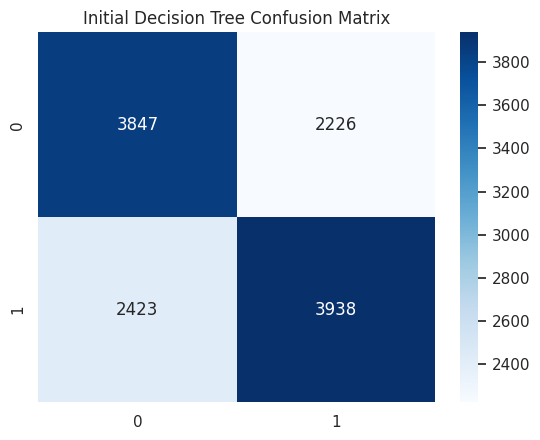

In [ ]:
# 7. Descion Tree

# Initializing the Decision Tree model
dt = DecisionTreeClassifier()

# Fiting the model to the training data
dt.fit(X_train, y_train)

# Predicting on the test data
y_pred_dt = dt.predict(X_test)

# Evaluating the initial performance
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Initial Decision Tree Accuracy: {accuracy}')

# Training Report
print('Training Report\n',classification_report(y_train , dt.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , dt.predict(X_test), digits=2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Initial Decision Tree Confusion Matrix')
plt.show()


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7252694225510696
Training Report
               precision    recall  f1-score   support

           0       0.77      0.69      0.73     24420
           1       0.73      0.80      0.76     25314

    accuracy                           0.75     49734
   macro avg       0.75      0.75      0.75     49734
weighted avg       0.75      0.75      0.75     49734

Testing Report
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      6073
           1       0.71      0.78      0.74      6361

    accuracy                           0.73     12434
   macro avg       0.73      0.72      0.72     12434
weighted avg       0.73      0.73      0.72     12434



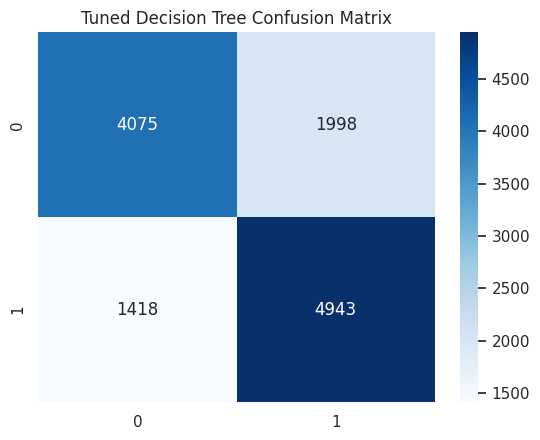

In [ ]:
# Tuning on Descion Tree

# Defining the parameter grid for Decision Tree
params_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the grid search
grid_dt = GridSearchCV(DecisionTreeClassifier(), params_dt, scoring='accuracy', cv=5)

# Fitting the grid search to the training data
grid_dt.fit(X_train, y_train)

# Getting the best Decision Tree model from the grid search
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Display the tuned results
print(f'Best Decision Tree Parameters: {grid_dt.best_params_}')
print(f'Tuned Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}')

# Training Report
print('Training Report\n',classification_report(y_train , best_dt.predict(X_train), digits=2))
# Testing Report
print('Testing Report\n',classification_report(y_test , best_dt.predict(X_test), digits=2))

# Confusion matrix for the best model
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()


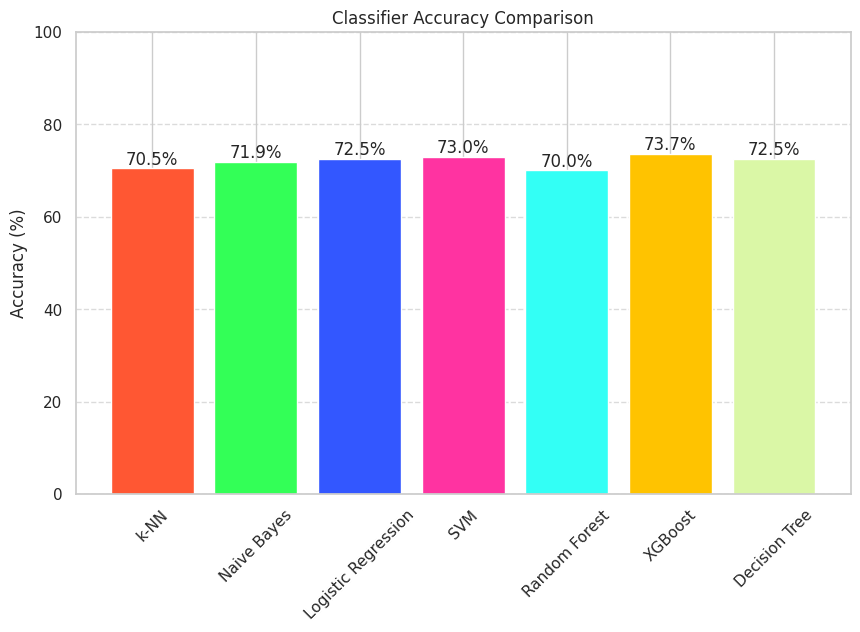

In [ ]:
# Comparing Accuracies

accuracies = {
    'k-NN': accuracy_score(y_test, y_pred_knn),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'Decision Tree': accuracy_score(y_test, y_pred_dt)
}

model_names = list(accuracies.keys())
model_scores = [score * 100 for score in accuracies.values()]

colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF5', '#FFC300', '#DAF7A6']

# Creating a vertical bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_scores, color=colors)

# Adding data labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}%',
             ha='center', va='bottom')

plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()



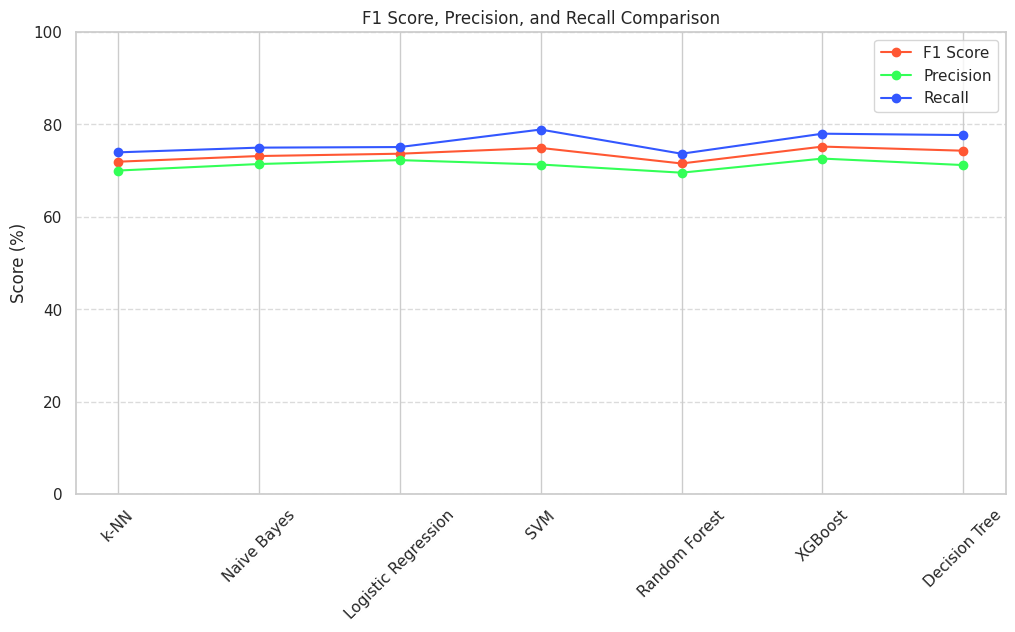

In [51]:
# Comparing F1_Score, Precision and Recall

from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 scores, precision, and recall
f1_scores = {
    'k-NN': f1_score(y_test, y_pred_knn),
    'Naive Bayes': f1_score(y_test, y_pred_nb),
    'Logistic Regression': f1_score(y_test, y_pred_lr),
    'SVM': f1_score(y_test, y_pred_svm),
    'Random Forest': f1_score(y_test, y_pred_rf),
    'XGBoost': f1_score(y_test, y_pred_xgb),
    'Decision Tree': f1_score(y_test, y_pred_dt)
}

precision_scores = {
    'k-NN': precision_score(y_test, y_pred_knn),
    'Naive Bayes': precision_score(y_test, y_pred_nb),
    'Logistic Regression': precision_score(y_test, y_pred_lr),
    'SVM': precision_score(y_test, y_pred_svm),
    'Random Forest': precision_score(y_test, y_pred_rf),
    'XGBoost': precision_score(y_test, y_pred_xgb),
    'Decision Tree': precision_score(y_test, y_pred_dt)
}

recall_scores = {
    'k-NN': recall_score(y_test, y_pred_knn),
    'Naive Bayes': recall_score(y_test, y_pred_nb),
    'Logistic Regression': recall_score(y_test, y_pred_lr),
    'SVM': recall_score(y_test, y_pred_svm),
    'Random Forest': recall_score(y_test, y_pred_rf),
    'XGBoost': recall_score(y_test, y_pred_xgb),
    'Decision Tree': recall_score(y_test, y_pred_dt)
}

# Prepare data for plotting
labels = list(f1_scores.keys())
f1_values = [score * 100 for score in f1_scores.values()]
precision_values = [precision_scores[label] * 100 for label in labels]
recall_values = [recall_scores[label] * 100 for label in labels]

# Define color palette
colors = ['#FF5733', '#33FF57', '#3357FF']

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(labels, f1_values, marker='o', label='F1 Score', color=colors[0])
plt.plot(labels, precision_values, marker='o', label='Precision', color=colors[1])
plt.plot(labels, recall_values, marker='o', label='Recall', color=colors[2])

# Adding titles and labels
plt.title('F1 Score, Precision, and Recall Comparison')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier().fit(X_train, y_train)
with open("xgboost_sklearn", "wb") as file:
    pickle.dump(model, file)